<a href="https://colab.research.google.com/github/MamadouBousso/IAProjects/blob/master/GloveETGensimExemple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modele GloVe
Global Vectors for Word Representation, ou GloVe, est un « algorithme d'apprentissage non supervisé permettant d'obtenir des représentations vectorielles pour les mots ». En termes simples, GloVe nous permet de prendre un corpus de texte et de transformer intuitivement chaque mot de ce corpus en une position dans un espace de grande dimension. Cela signifie que des mots similaires seront placés ensemble.

Rendez-vous sur https://nlp.stanford.edu/projects/glove/.
Ensuite, sous « Télécharger des vecteurs de mots pré-entraînés », vous pouvez choisir l'une des quatre options pour différentes tailles ou ensembles de données d'entraînement.
Choisissons les vecteurs Wikipedia 2014 + Gigaword 5. Vous pouvez télécharger ces vecteurs exacts sur http://nlp.stanford.edu/data/glove.6B.zip (AVERTISSEMENT : C'EST UN TÉLÉCHARGEMENT DE 822 Mo)
Je ne peux pas garantir que les méthodes utilisées ci-dessous fonctionneront avec tous les autres vecteurs pré-entraînés, car ils n'ont pas été testés.

In [ ]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Chargement des vecteurs
Avant de charger les vecteurs dans le code, nous devons comprendre comment le fichier texte est formaté.
Chaque ligne du fichier texte contient un mot, suivi de N chiffres. Les nombres N décrivent le vecteur de la position du mot. N peut varier en fonction des vecteurs que vous avez téléchargés. On en pour des dimensions de 50 avec  gant.6B.50d ou 100 avec gant.6B.100d ou 300 avec gant.6B.300d
Voici un exemple de ligne du fichier texte, raccourci aux trois premières dimensions :
**business 0.023693 0.13316 0.023131 ...**

In [ ]:
embeddings_dict = {}

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/deep-learning-v2-pytorch/word2vec-embeddings/glove.6B'

In [ ]:
import sys
sys.path.append(path)

In [ ]:
with open(path+'/glove.6B.100d.txt','r',encoding="utf-8") as f:
  for line in f:
  
    values = line.split()
    word  = values[0]
    vect = np.asarray(values[1:],"float32")
    embeddings_dict[word]=vect

##Trouver des vecteurs similaires
Une autre chose que nous pouvons faire avec les vecteurs GloVe est de trouver les mots les plus similaires à un mot donné. Nous pouvons le faire avec une fonction:

In [ ]:
def find_closest_embeddings(embedding,funct):
    return sorted(embeddings_dict.keys(), key= funct)


### On choisit la distance euclidienne

In [ ]:
find_closest_embeddings(embeddings_dict["obama"],lambda word: spatial.distance.euclidean(embeddings_dict[word], embeddings_dict["obama"]))[:10]
    

['obama',
 'barack',
 'bush',
 'clinton',
 'mccain',
 'gore',
 'hillary',
 'dole',
 'romney',
 'rodham']

In [ ]:
find_closest_embeddings(embeddings_dict["banana"],lambda word: spatial.distance.euclidean(embeddings_dict[word], embeddings_dict["banana"]))[:10]

['banana',
 'mango',
 'coconut',
 'bananas',
 'potato',
 'pineapple',
 'papaya',
 'bean',
 'pecan',
 'cashew']

### On choisit le cosine similarity

In [ ]:
find_closest_embeddings(embeddings_dict["obama"],lambda word: spatial.distance.cosine(embeddings_dict[word], embeddings_dict["obama"]))[:10]

['obama',
 'barack',
 'bush',
 'clinton',
 'mccain',
 'gore',
 'hillary',
 'dole',
 'rodham',
 'romney']

In [ ]:
find_closest_embeddings(embeddings_dict["banana"],lambda word: spatial.distance.cosine(embeddings_dict[word], embeddings_dict["banana"]))[:10]

['banana',
 'coconut',
 'mango',
 'bananas',
 'potato',
 'pineapple',
 'fruit',
 'peanut',
 'pecan',
 'cashew']

## Visualisation 
Rien n'aide plus à trouver des informations dans les données que de les visualiser.
Pour visualiser les vecteurs, nous allons d'abord utiliser une méthode connue sous le nom de plongement voisin stochastique distribué en t, également connu sous le nom de t-SNE. t-SNE va nous permettre de réduire les dimensions par exemple, de 100 dimensions des données, jusqu'à 2 dimensions. Après cela, c'est aussi simple que d'utiliser un nuage de points matplotlib pour le tracer. Si vous souhaitez en savoir plus sur t-SNE, il y a quelques articles liés à la fin.
sklearn a heureusement une classe t-SNE qui peut rendre notre travail beaucoup plus gérable. Pour l'instancier, on peut utiliser :

In [ ]:
tsne = TSNE(n_components=2, random_state=0)

**n_components** spécifie le nombre de dimensions dans lesquelles réduire les données.
**random_state** est le seed que nous pouvons utiliser pour obtenir des résultats cohérents.

Après avoir initialisé la classe t-SNE, nous devons obtenir une liste de chaque mot et le vecteur correspondant à ce mot.

In [ ]:
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]

In [ ]:
Y = tsne.fit_transform(vectors[:100])

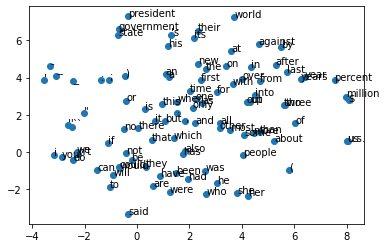

In [ ]:
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

#Word2Vec avec Gensim
Pour regarder les vecteurs de mots, j'utiliserai Gensim. Gensim n'est pas vraiment un package de deep learning. Il s'agit d'un package pour la modélisation de la similarité des mots et des textes, qui a commencé avec le topic modelling et s'est transformé en SVD et en représentations de mots avec les reseaux de neurones. Mais c'est efficace et évolutif, et assez largement utilisé.



Nous allons utiliser les vecteurs GloVe utilisés ci-dessus. Gensim permet de convertir un fichier de vecteurs GloVe en format word2vec.

(J'utilise les vecteurs 100d ci-dessous comme un mélange entre la vitesse et la taille par rapport à la qualité. Si vous essayez les vecteurs 50d, ils fonctionnent essentiellement pour la similitude mais ne sont clairement pas aussi bons pour les problèmes d'analogie. Si vous chargez les vecteurs 300d, ils 'sont encore meilleurs que les vecteurs 100d.).

In [ ]:
from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
glove_file = datapath('/content/drive/MyDrive/Colab Notebooks/deep-learning-v2-pytorch/word2vec-embeddings/glove.6B/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

On cree un modele

In [ ]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [ ]:
dir(model)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_log_evaluate_word_analogies',
 '_save_specials',
 '_smart_save',
 'accuracy',
 'add',
 'closer_than',
 'cosine_similarities',
 'distance',
 'distances',
 'doesnt_match',
 'evaluate_word_analogies',
 'evaluate_word_pairs',
 'get_keras_embedding',
 'get_vector',
 'index2entity',
 'index2word',
 'init_sims',
 'load',
 'load_word2vec_format',
 'log_accuracy',
 'log_evaluate_word_pairs',
 'most_similar',
 'most_similar_cosmul',
 'most_similar_to_given',
 'n_similarity',
 'rank',
 'save',
 'save_word2vec_format',
 'similar_by_vector',
 's

In [ ]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.751889705657959),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472623586654663)]

In [ ]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532904624939),
 ('fruit', 0.6519855260848999),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [ ]:
model.most_similar?

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [ ]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [ ]:
analogy('japan','japanese','senegal')

'senegalese'

In [ ]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [ ]:
model.doesnt_match?

In [ ]:
model.doesnt_match(['senegal', 'meal', 'is', 'pasta'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'senegal'

In [ ]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

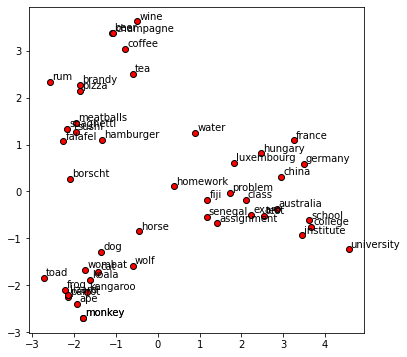

In [ ]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf','senegal',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3250 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3250 missing from current font.
  font.set_text(s, 0, flags=flags)


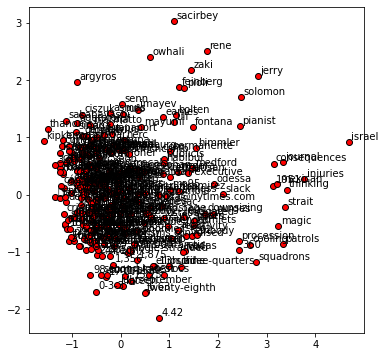

In [ ]:
display_pca_scatterplot(model, sample=300)